# JIDT: Statistical Significance
## Activity: Generating surrogate distributions


In this activity we will generate surrogate distributions to assess the statistical significance of estimates from several different estimator types, and examine their properties.
<br>

1. Start by opening the MI AutoAnalyser. Select a Gaussian estimator, data file 2CoupledRandomCols-1.txt and click the checkbox next to Add stat signif.?. Click Generate Code and Compute.
2. Open the Python code tab, read the code from the comment # 6. Compute the (statistical significance ... onwards to see how the empirical surrogate distribution is dealt with, and see the results printed in the Status area.
3. Find the generated code file GeneratedCalculator.py in demos/AutoAnalyser, rename or move it (so it doesn't get overwritten later), and open for editing.
4. Replace the loaded data in the source and destination variables with the following lines:

    N = 100 # Number of samples to use <br>
    S = 1000 # Number of surrogates to generate <br>
    source = np.random.rand(N, 1) # assign random normal data to source <br>
    coupling = 0 # We'll change this later <br>
    destination = np.random.rand(N, 1) # assign random normal data to destination <br>

In [ ]:
### Remember!
# Import numpy as follows:<br>
import numpy
import matplotlib.pyplot as plt

N = 100 # Number of samples to use <br>
S = 1000 # Number of surrogates to generate <br>
source = numpy.random.rand(N, 1) # assign random normal data to source <br>
coupling = 0 # We'll change this later <br>
destination = numpy.random.rand(N, 1) # assign random normal data to destination <br>

"""
Insert your code below this line.
"""
# HERE

5. Replace the number of surrogates generated in the <b>measDist = calc.computeSignificance(100)</b> line from 100 to <b>S</b>, to use the above variable. Do the same changing the 100 to S in the final <b>print</b> statement.
6. Run the code in Python (making sure to change your working directory to <b>demos/AutoAnalyser</b> or wherever you have saved it) to make sure you haven't broken it!
7. You can access an array of the surrogate measurements in the <b>distribution</b> member of the object <b>measDist</b>. Plot a histogram of the surrogate distribution by adding the line <b>plt.hist(measDist.distribution, 50)</b> and run the script again.
8. Now let's add a marker to the plot to show where our measured value of MI sits with respect to the surrogate distribution. We'll need some additional data from the histogram for this plot also, so let's add:

In [ ]:
meanDist = measDist.getMeanOfDistribution()

plt.hist(measDist.distribution, 50)
plt.axvline(linestyle='--', color='red', x=meanDist ) # Mark in our measured MI

9. And add the following lines to put a nice title on the plot: (This is good practice for your assignments!)

In [ ]:
# Now add a nice title to the plot
plt.title('Surrogate distribution for {} samples,\ncoupling={:.02f}, {} surrogates, estimator={}'.\
                format(N, coupling, S, calcName.partition("continuous.")[2].partition("." )[0]))


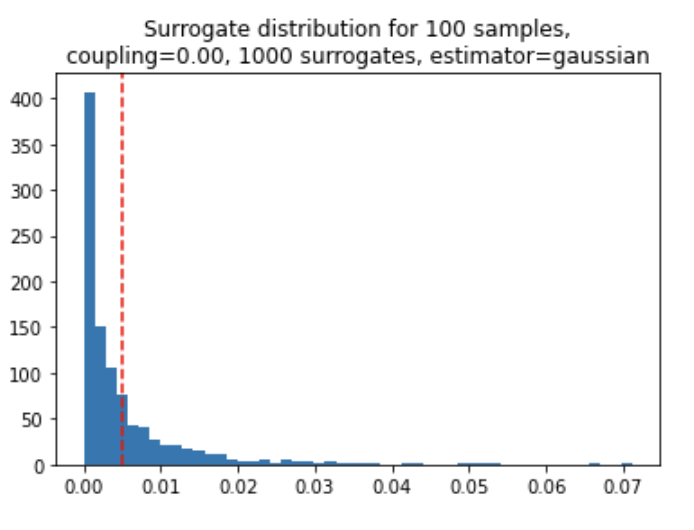

10. Note the scale of the x axis of the surrogate distribution (you could save the plot to compare to later). Now change the number of samples N in your code to be 10 times larger. How do you expect the surrogate distribution to change when it is based on more samples, and why? Run the code and notice how the surrogate distribution changes. Did this match your expectation?

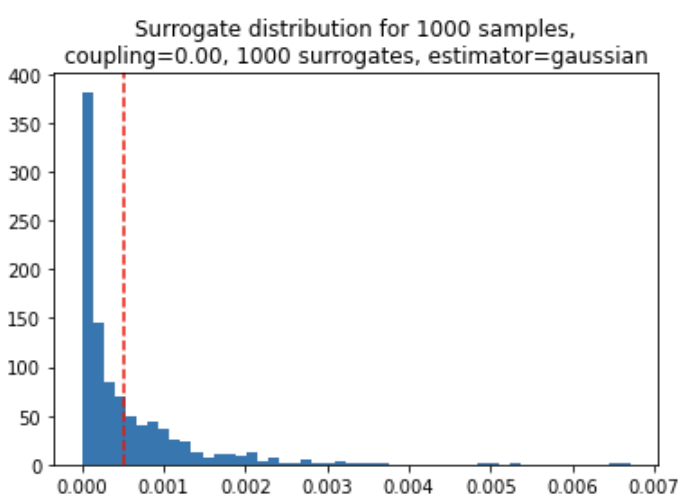

11. Our work so far has dealt with measuring an MI between independent source and destination. Let's introduce a dependence -- this will not change the surrogate distribution, but may change the statistical significance of the measurement. Change the code where the destination variable is assigned:

In [ ]:
couplig = 0.01
destination = coupling * source + (1 - coupling) * source

12. Do you expect to see a statistically significant MI here because of the coupling? Run the code and find out. Remember that we are sampling, so run the code a few times to get a feeling for the range of results. Reflect on why might you see this outcome regarding the statistical significance?

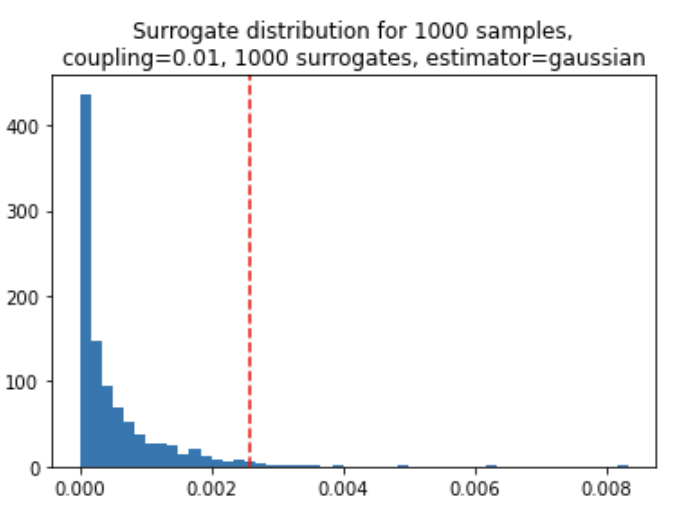

13. Let's turn up the coupling variable to 0.05 make the effect stronger and see if we can detect the dependence. Does that help or is it still too small to detect, given the number of samples that we have? Try using more samples (set N = 10000) -- does this make it easier to discern the dependence effect from background noise? Why? What factors have you now observed to help or hinder us to detect dependence between variables from empirical data?

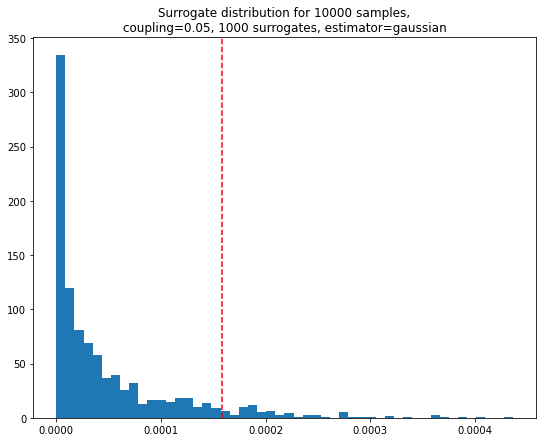

14. Switch back to <b>N=1000</b> samples and change the calculator type to <b>KSG (algorithm 1)</b>. You might want to generate new code to see how to construct this estimator, and then paste the constructor line into your current script. See how this changes the surrogate distribution:
 - Compare the means of the surrogate distributions (notice where the KSG surrogate distribution is centred), and relate this to the KSG estimator having bias correction. (The negative values are not incorrect, they simply reflect a value smaller than the expected bias).
 - Compare the standard deviations of the surrogate distributions. What factors might contribute to their difference?

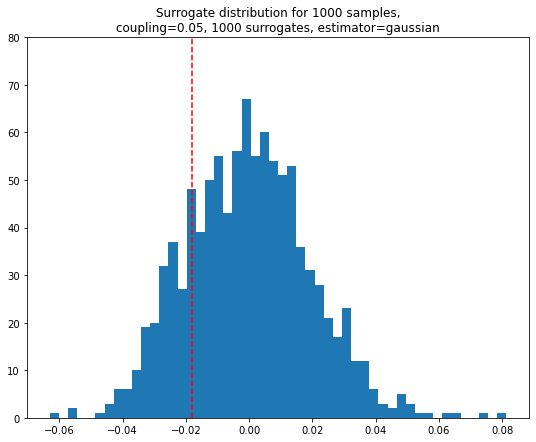

15. Finally, did the calculation with the KSG estimator find a statistically significant relationship here (for  N=1000 and coupling=0.05)? Compare this to the earlier result with the Gaussian estimator, and explain what you observe in terms of the properties of the estimators and how they are suited to the underlying relationship here. Find out how large does the coupling needs to be for 1000 samples in order to observe a statistically significant relationship here? (You can also try to increase the number of samples, but remember the KSG estimator runtime scales as N log N -- it will need around a minute to calculate for 10000 samples here)